# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

- Provide insight into the effectiveness of the new landing page versus the old landing page.

## Import all the necessary libraries

In [1]:
# import scipy and check version
import scipy
scipy.__version__

'1.7.3'

In [2]:
# import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import scipy.stats as stats

## Reading the Data into a DataFrame

In [3]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data into a dataframe

e_news = pd.read_csv('/content/drive/MyDrive/Data Science/UT Certification Course/Week 9: Project 2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
e_news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
e_news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
e_news.shape

(100, 6)

In [8]:
e_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
e_news.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [10]:
e_news.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
e_news.duplicated().sum()

0

### Univariate Analysis

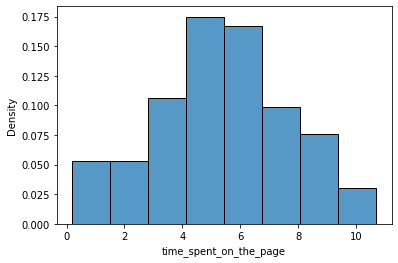

In [12]:
sns.histplot(data=e_news,x='time_spent_on_the_page',stat='density')
plt.show()

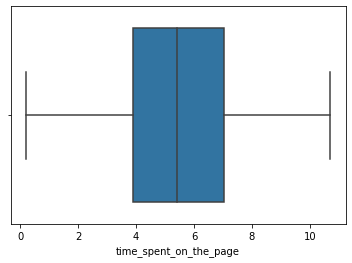

In [13]:
sns.boxplot(data=e_news,x='time_spent_on_the_page')
plt.show()

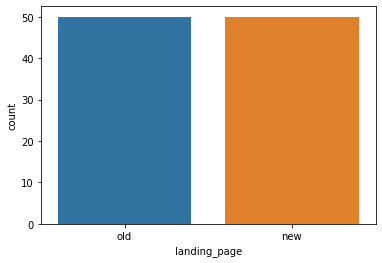

In [14]:
sns.countplot(data=e_news,x='landing_page')
plt.show()

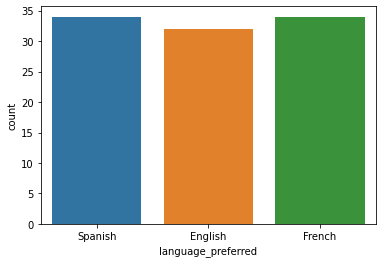

In [15]:
sns.countplot(data=e_news,x='language_preferred')
plt.show()

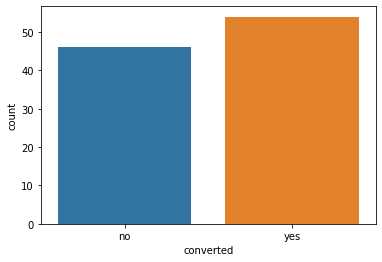

In [16]:
sns.countplot(data=e_news,x='converted')
plt.show()

### Bivariate Analysis

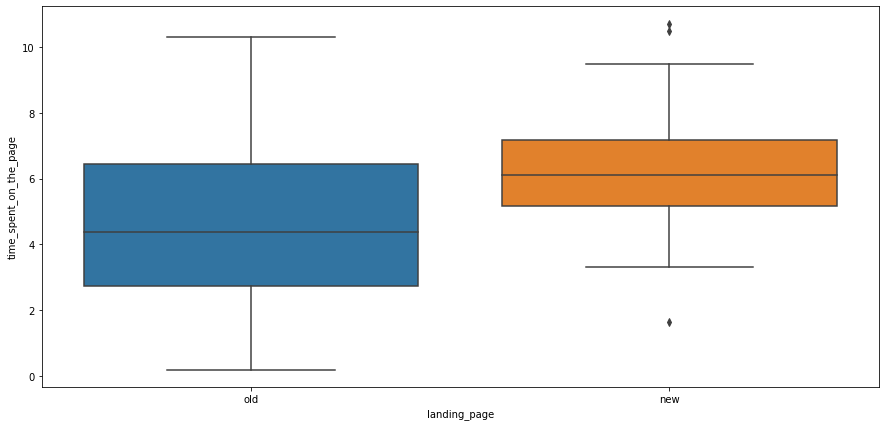

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(data=e_news,x='landing_page',y='time_spent_on_the_page')
plt.show()

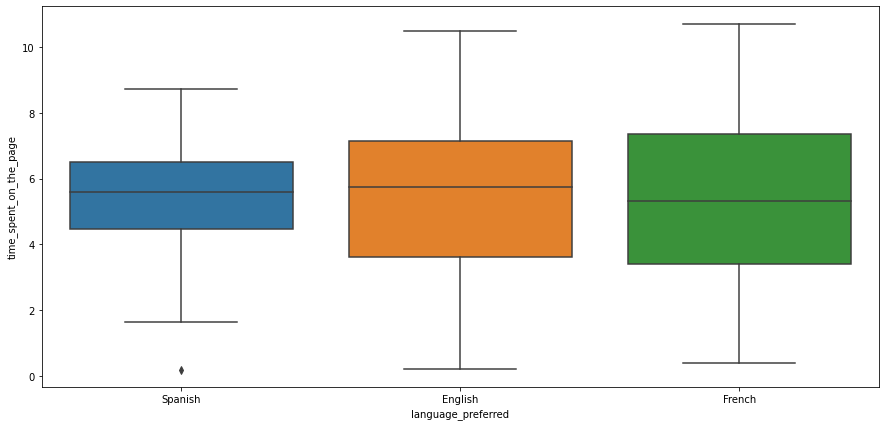

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(data=e_news,x='language_preferred',y='time_spent_on_the_page')
plt.show()

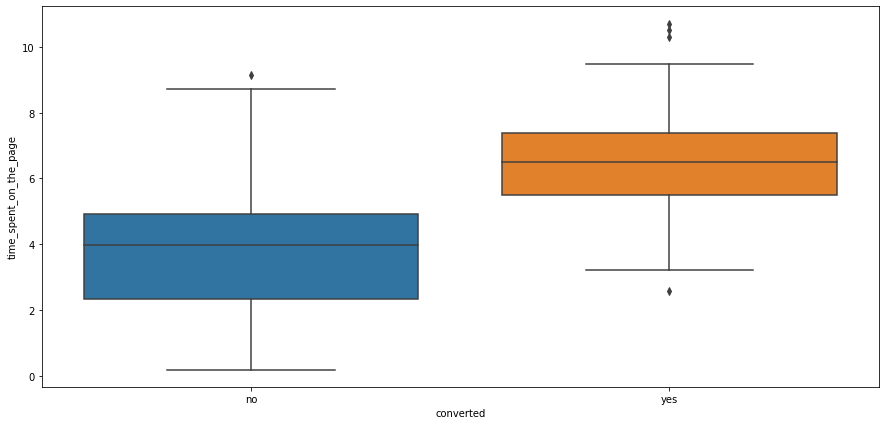

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(data=e_news,x='converted',y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

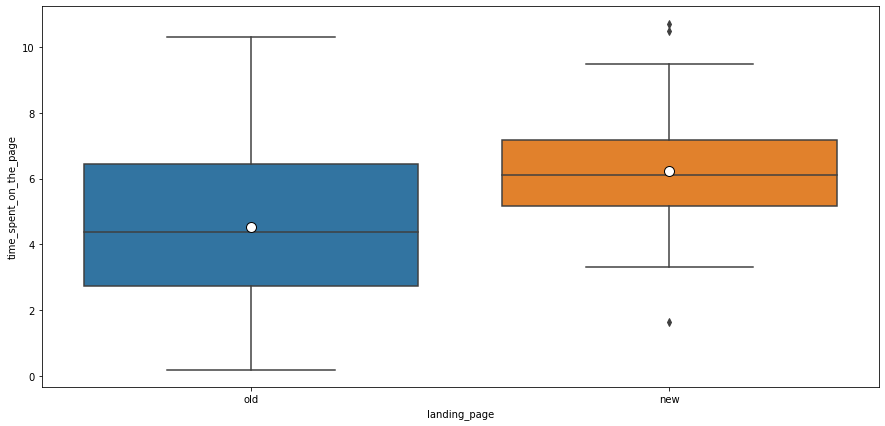

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(data=e_news,x='landing_page',y='time_spent_on_the_page', showmeans=True, meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'10'})
plt.show()

### Step 1: Define the null and alternate hypotheses

### Null Hypothesis: Users spend the same amount of time on the new and old landing pages.

### Alternate Hypothesis: Users spend more time on the new landing page than the old landing page.

### Step 2: Select Appropriate test

### We will use a 2-sample independent T test.

### Step 3: Decide the significance level

### The significance level is 5%.

### Step 4: Collect and prepare data

In [21]:
page_time = e_news[['landing_page','time_spent_on_the_page']]
page_time

,landing_page,time_spent_on_the_page
0,old,3.48
1,new,7.13
2,new,4.40
3,old,3.02
4,new,4.75
...,...,...
95,new,5.15
96,old,6.52
97,new,7.07
98,new,6.20


In [22]:
# Average time spent on OLD landing page.

page_time_old = page_time[(page_time['landing_page']== 'old')]
old_page_mean = page_time_old['time_spent_on_the_page'].mean()
old_page_mean

4.532400000000001

In [23]:
# Average time spent on NEW landing page.

page_time_new = page_time[(page_time['landing_page']== 'new')]
new_page_mean = page_time_new['time_spent_on_the_page'].mean()
new_page_mean

6.2232

### Step 5: Calculate the p-value

In [24]:
#import the required function
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(page_time_new['time_spent_on_the_page'], page_time_old['time_spent_on_the_page'], equal_var = True, alternative = 'greater')
p_value

0.0001316123528095005

### Step 6: Compare the p-value with $\alpha$

### The p-value (0.0001316123528095005) is less than .05.

### Step 7:  Draw inference

### Because the p-value is less than .05, we must reject the null hypothesis.

- Users spend significantly more time on the new landing page than the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Step 1: Define the null and alternate hypotheses

Null hypothesis: The conversion rate for the new page is equal to the conversion rate for the old page.

Alternate hypothesis: The conversion rate for the new page is greater than the conversion rate for the old page.

### Step 2: Select appropriate test.

We will use a 2-sample z-test to compare the proportions from two populations.

### Step 3: Decide the significance level.

The significance level is 5%.

### Step 4: Collect and prepare data.

In [25]:
# Extract landing page and converted columns.

page_conversions = e_news[['landing_page','converted']]
page_conversions

,landing_page,converted
0,old,no
1,new,yes
2,new,no
3,old,no
4,new,yes
...,...,...
95,new,no
96,old,yes
97,new,yes
98,new,yes


In [26]:
# Create new dataframe with only new page.

page_conversions_new = page_conversions[(page_conversions['landing_page']=='new')]

In [27]:
# Create new dataframe with only new page conversions.
page_conversions_new_yes = page_conversions_new[(page_conversions_new['converted']=='yes')]

In [28]:
# Create new dataframe with only old page.
page_conversions_old = page_conversions[(page_conversions['landing_page']=='old')]

In [29]:
# Create new dataframe with only old page conversions.
page_conversions_old_yes = page_conversions_old[(page_conversions_old['converted']=='yes')]

In [30]:
page_conversions_new_yes.value_counts()

landing_page  converted
new           yes          33
dtype: int64

In [31]:
page_conversions_old_yes.value_counts()

landing_page  converted
old           yes          21
dtype: int64

### Step 5: Find the p-value.

In [32]:
### INCORRECT (my answer)

# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversions
conversions = np.array([21, 33])

# set the sample sizes
page_visits = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversions, page_visits)
p_value

0.016052616408112556

In [33]:
#### CORRECT SOLUTION

# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversions
conversions = np.array([33, 21])

# set the sample sizes
page_visits = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversions, page_visits, alternative = 'larger')
p_value

0.008026308204056278

### Step 6: Compare the p-value with a.

The p-value (.016) is less than .05.

### Step 7: Draw inference.

- Because the p-value is less than .05, we must reject the null hypothesis.

- The conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language independent or related?

### Visualize the Data

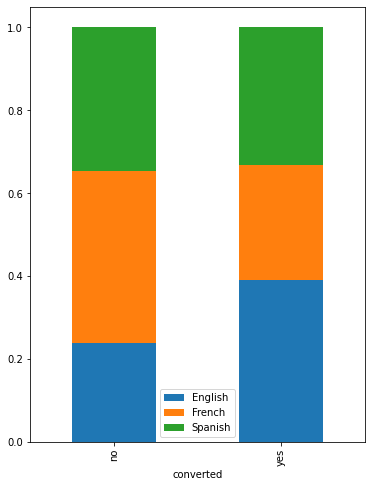

In [41]:
pd.crosstab(e_news['converted'], e_news['language_preferred'], normalize = 'index').plot(kind='bar', figsize=(6,8), stacked = True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

Null hypothesis: Conversions and the preferred language are independent.

Alternate hypothesis: Conversions and the preferred language are dependent.

Correct Alt Hyp: Conversion status is not independent of the preferred language.

### Step 2: Select appropriate test.

We will use the Chi Sq Test of Independence.

### Step 3: Decide the significance level.

The significance level is 5%.

### Step 4: Collect and prepare data.

In [34]:
# Extract converted and language columns.

# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(e_news['converted'],e_news['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Find the p-value.

In [35]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with a.

The p-value (.213) is greater than .05.

### Step 7: Draw inference.

- The p-value (.213) is greater than .05, so we fail to reject the null hypothesis.

- Conversions and preferred language are independent.

## 4. Is the time spent on the new page same for the different language users?

### Visualize the Data

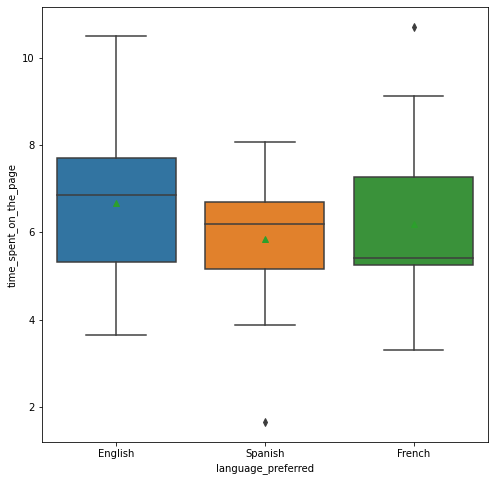

In [42]:
plt.figure(figsize=(8,8))
# create a new DataFrame for users served the new page
df_new = e_news[e_news['landing_page']== 'new']
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null hypothesis: The average time spent on the new landing page is the same for all languages.

Alternate hypothesis: The average time spent on the new landing page is different for at least one language.

### Step 2: Select appropriate test.

We will use the ANOVA Test.

### Step 3: Decide the significance level.

The significance level is 5%.

### Step 4: Collect and prepare data.

In [36]:
page_time_language = e_news[['landing_page','time_spent_on_the_page','language_preferred']]
page_time_language

,landing_page,time_spent_on_the_page,language_preferred
0,old,3.48,Spanish
1,new,7.13,English
2,new,4.40,Spanish
3,old,3.02,French
4,new,4.75,Spanish
...,...,...,...
95,new,5.15,Spanish
96,old,6.52,English
97,new,7.07,Spanish
98,new,6.20,Spanish


In [37]:
page_time_language_new = page_time_language[(page_time_language['landing_page']=='new')]
page_time_language_new.groupby(['language_preferred']).mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Step 5: Shapiro Test

In [38]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(page_time_language_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


- P-value is very large, so we fail to reject the null hypothesis. This sample follows a normal distribution.

### Step 6: Levene's Test

In [39]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(page_time_language_new['time_spent_on_the_page'][page_time_language_new['language_preferred']=="English"], 
                                   page_time_language_new['time_spent_on_the_page'][page_time_language_new['language_preferred']=="Spanish"], 
                                   page_time_language_new['time_spent_on_the_page'][page_time_language_new['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


- The p-value is very large, so we fail to reject the null hypothesis of homogeneity of variances.

### Step 7: Find the p-value.

In [40]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(page_time_language_new.loc[page_time_language_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              page_time_language_new.loc[page_time_language_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              page_time_language_new.loc[page_time_language_new['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 8: Compare the p-value with a.

- The p-value (.432) is much greater than .05.

### Step 9: Draw inference.

- Because the p-value (.432) is much greater than .05, we fail to reject the null hypothesis.

- The average time spent on the new landing page is the same for all languages.

## Conclusions

- Users spend significantly more time on the new landing page than the old page.

- The conversion rate for the new page is significantly higher than for the old page.

- Conversion rate and preferred language are independent of each other.

- Time spent on the new page is the same for all languages.

### Business Recommendations

- Move forward with the new landing page, as it is more effective than the old page.

___